# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


# Display the data table for preview


In [8]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [9]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [10]:
# Combine the data into a single DataFrame
# Display the data table for preview
merge_data=pd.merge(mouse_metadata,study_results,how='outer')
merge_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice.
mice=merge_data["Mouse ID"].value_counts()
len(mice)

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = merge_data.loc[merge_data.duplicated(subset = ['Timepoint','Mouse ID']), 'Mouse ID'].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [15]:
duplicate_mice_df = merge_data.loc[merge_data.duplicated(subset=['Timepoint','Mouse ID'], keep =False), :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_data.loc[merge_data['Mouse ID'] != "g989", :]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tummor = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tummor = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tummor = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdev_tummor = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tummor = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean_tummor,
            "Median Tumor Volume":median_tummor,
            "Tumor Volume Variance":variance_tummor,
            "Tumor Volume Std. Dev.":stdev_tummor,
            "Tumor Volume Std. Err.":sem_tummor
             })
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, '# of Observed Mouse Timepoints')

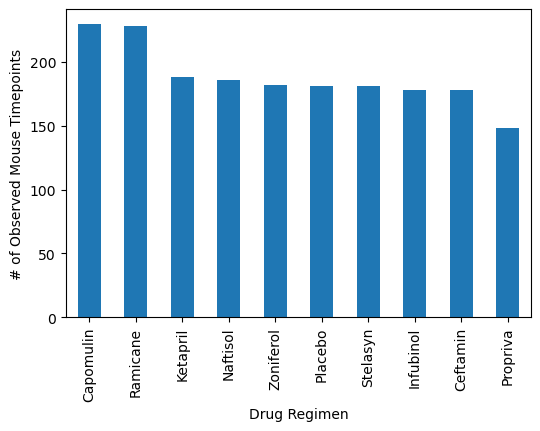

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts=clean_df["Drug Regimen"].value_counts()
bar=counts.plot(kind="bar", figsize = (6,4))
bar.set_xlabel ("Drug Regimen", size = 10)
bar.set_ylabel ("# of Observed Mouse Timepoints", size = 10)


Text(0, 0.5, '# of Observed Mouse Timepoints')

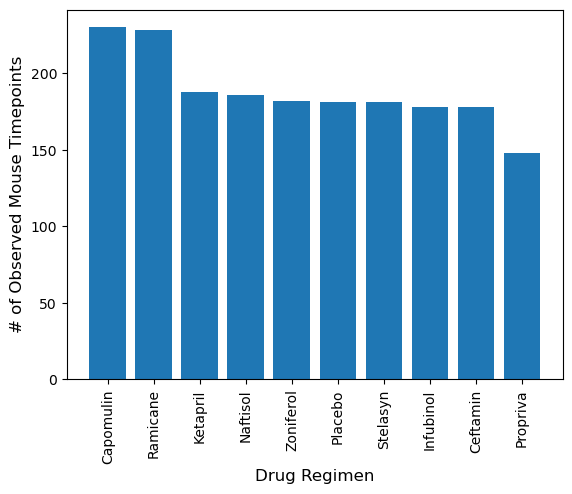

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts=clean_df["Drug Regimen"].value_counts()
plt.Figure(figsize=(6,4))
plt.bar(counts.index,counts.values)
plt.xticks(rotation="vertical", fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Drug Regimen",size=12)
plt.ylabel("# of Observed Mouse Timepoints",size=12)


<Axes: title={'center': 'Gender Distribution'}, ylabel='sex'>

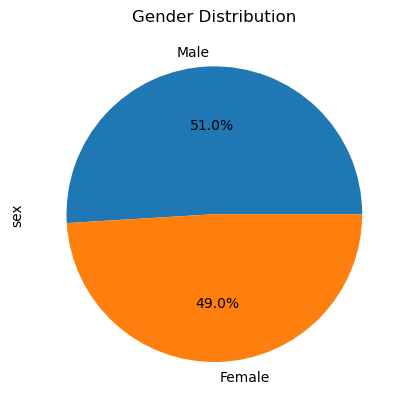

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dis=clean_df["Sex"].value_counts()
gender_dis.plot(kind="pie",title="Gender Distribution",autopct="%1.1f%%",ylabel="sex")


Text(0.5, 1.0, 'Gender Distribution')

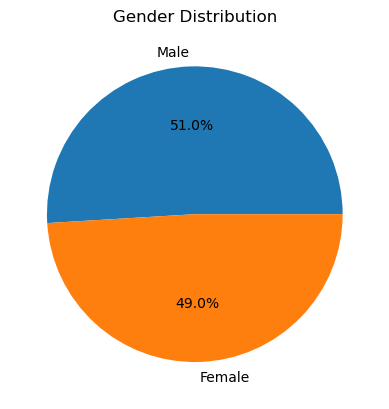

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_dis=clean_df["Sex"].value_counts()
labels = gender_dis.index
plt.pie(gender_dis,labels=labels,autopct="%1.1f%%")
plt.title("Gender Distribution")


## Quartiles, Outliers and Boxplots

In [112]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df=clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df=clean_df.loc[clean_df["Drug Regimen"]=="Ramicane",:]
Infubinol_df=clean_df.loc[clean_df["Drug Regimen"]=="Infubinol",:]    
Ceftamin_df=clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin",:]                          
                                 
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
Capomulin_max= Capomulin_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
Capomulin_merge=Capomulin_max.merge(clean_df[["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=("Mouse ID","Timepoint"),how="left")
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,b128,45,Capomulin,38.982878
1,b742,45,Capomulin,38.939633
2,f966,20,Capomulin,30.485985
3,g288,45,Capomulin,37.074024
4,g316,45,Capomulin,40.159220


In [113]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [114]:
# Ramicane
Ramicane_max= Ramicane_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
Ramicane_merge=Ramicane_max.merge(clean_df[["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [116]:
# Infubinol 
# Determine outliers using upper and lower bounds
Infubinol_max= Infubinol_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
Infubinol_merge=Infubinol_max.merge(clean_df[["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [119]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds
Ceftamin_max= Ceftamin_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
Ceftamin_merge=Ceftamin_max.merge(clean_df[["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]
quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


(10.0, 80.0)

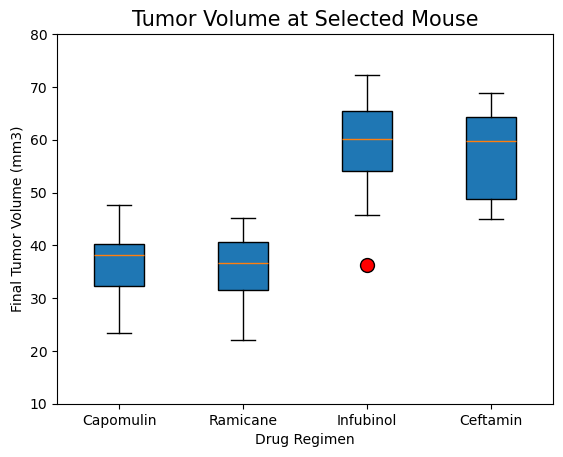

In [126]:
# Put treatments into a list for for loop (and later for plot labels)
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
labels= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
plt.Figure(figsize=(6,4))
plt.boxplot(data_to_plot, labels=labels, widths = 0.4, patch_artist=True,vert=True,flierprops = dict(marker = "o",markersize=10, markerfacecolor = "red"))
plt.title('Tumor Volume at Selected Mouse',fontsize =15)
plt.ylabel('Final Tumor Volume (mm3)',fontsize = 10)
plt.xlabel('Drug Regimen',fontsize = 10)
plt.ylim(10, 80)



## Line and Scatter Plots

In [131]:
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


Text(0, 0.5, 'Tumor Volume (mm3)')

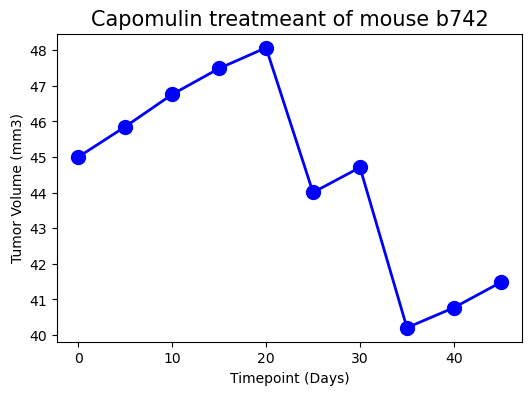

In [132]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(6,4))
plt.title('Capomulin treatmeant of mouse b742',fontsize =15)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=10,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =10)
plt.ylabel('Tumor Volume (mm3)',fontsize =10)

In [137]:
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

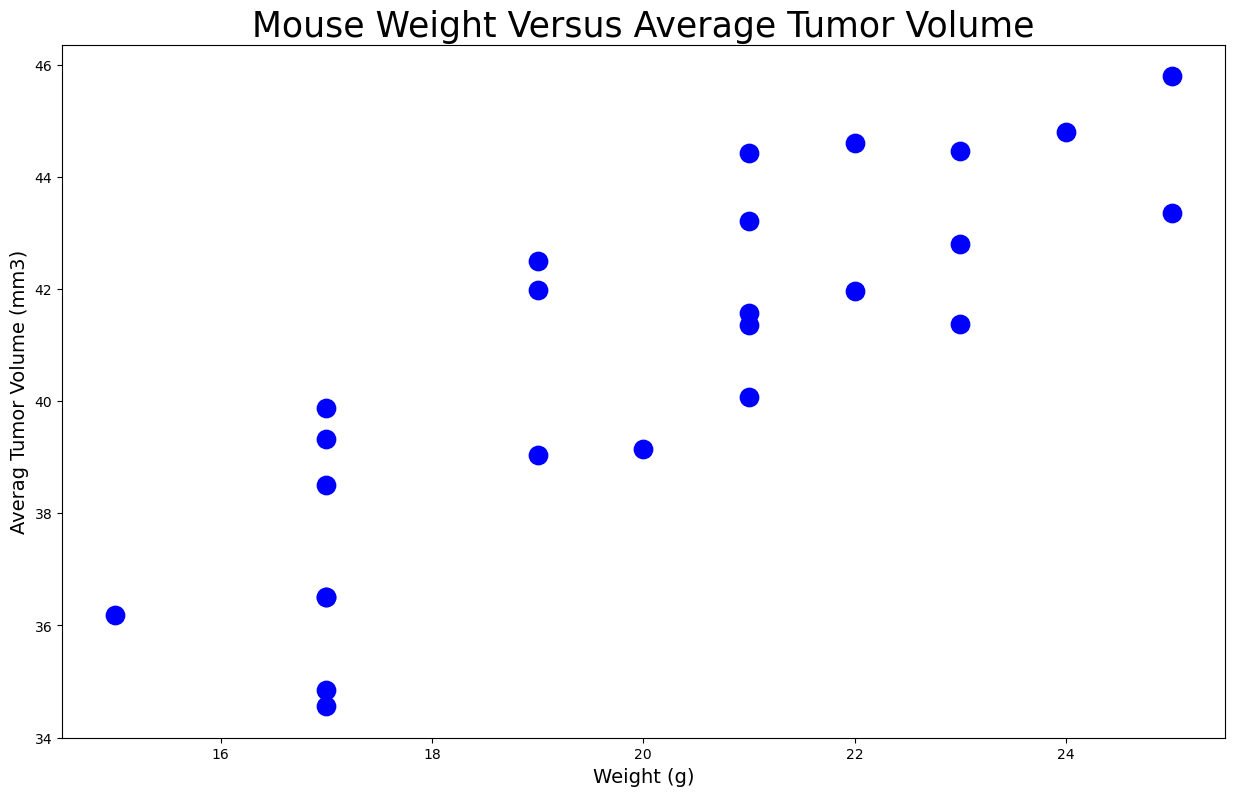

In [156]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15, 9))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID'])["Weight (g)"].mean()
Tumor_3=Capomulin_df.groupby(['Mouse ID'])["Tumor Volume (mm3)"].mean()
marker_size=15
plt.scatter(avg_capm_vol,Tumor_3,s=175, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


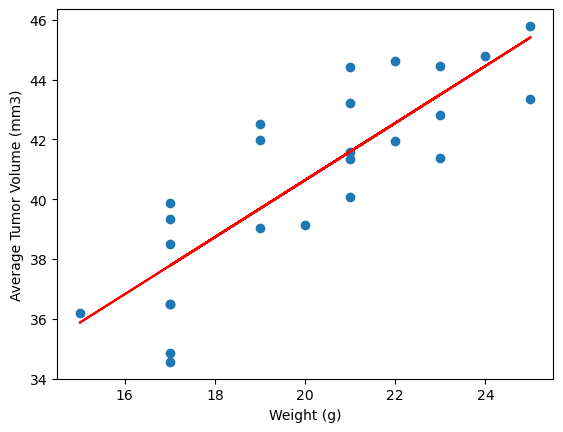

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
